In [1]:
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import eager_gradcam

In [2]:
model_init = tf.keras.applications.InceptionV3(include_top=False)  # loading base model without last layers

It's best to use last layer which is devoid of activation function, thus we load InceptionV3 without including top layers and we add GAP and one Dense layer of the same dimensionality as the original but with no activation.

In [3]:

y = model_init.output
y = tf.keras.layers.GlobalAveragePooling2D()(y)
y = tf.keras.layers.Dense(1000, activation=None, name='output_dense')(y) # activation none for Grad-CAM
model = tf.keras.models.Model(inputs=model_init.input, outputs=y)


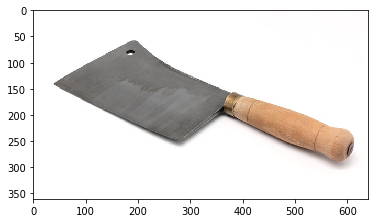

In [4]:
im = Image.open('images/cleaver.jpg')
plt.imshow(im)

### It's that easy:

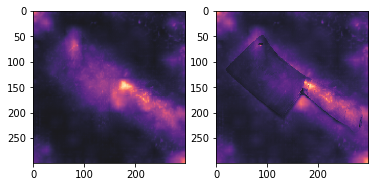

In [5]:
eager_gradcam.grad_cam('images/cleaver.jpg', model, (299,299))

On the left you see the gradient heatmap.

On the right you see gradient heatmap element-wise multiplied with the original resized image.

A comment on image size: it's strongly recommended to use image dimensions that are consistent with image dimensions used for training of the network. In case of InceptionV3 these are 299 x 299 pixels.